In [20]:
# Import libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjust the configuration of the plots created

In [28]:
# Read in the data

df = pd.read_csv( r'movies.csv', encoding='ISO-8859-1')
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [22]:
# Checking for missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

budget - 0.0%
company - 0.0%
country - 0.0%
director - 0.0%
genre - 0.0%
gross - 0.0%
name - 0.0%
rating - 0.0%
released - 0.0%
runtime - 0.0%
score - 0.0%
star - 0.0%
votes - 0.0%
writer - 0.0%
year - 0.0%


In [24]:
# Data types for columns

df.dtypes

budget      float64
company      object
country      object
director     object
genre        object
gross       float64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object

In [29]:
# Cleaning up column data types

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [30]:
#Create year correct column

df['year_correct'] = df['released'].astype(str).str[:4]
df.head(10)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,year_correct
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,1986
5,6000000,Hemdale,UK,Oliver Stone,Drama,138530565,Platoon,R,1987-02-06,120,8.1,Charlie Sheen,317585,Oliver Stone,1986,1987
6,25000000,Henson Associates (HA),UK,Jim Henson,Adventure,12729917,Labyrinth,PG,1986-06-27,101,7.4,David Bowie,102879,Dennis Lee,1986,1986
7,6000000,De Laurentiis Entertainment Group (DEG),USA,David Lynch,Drama,8551228,Blue Velvet,R,1986-10-23,120,7.8,Isabella Rossellini,146768,David Lynch,1986,1986
8,9000000,Paramount Pictures,USA,Howard Deutch,Comedy,40471663,Pretty in Pink,PG-13,1986-02-28,96,6.8,Molly Ringwald,60565,John Hughes,1986,1986
9,15000000,SLM Production Group,USA,David Cronenberg,Drama,40456565,The Fly,R,1986-08-15,96,7.5,Jeff Goldblum,129698,George Langelaan,1986,1986


In [32]:
df.sort_values(by=['gross'], inplace=False, ascending=False)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,year_correct
6380,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,2015-12-18,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015,2015
5061,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,2009-12-18,162,7.8,Sam Worthington,954412,James Cameron,2009,2009
2420,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,Titanic,PG-13,1997-12-19,194,7.8,Leonardo DiCaprio,862554,James Cameron,1997,1997
6391,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,2015-06-12,124,7.0,Chris Pratt,469200,Rick Jaffa,2015,2015
5723,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,2012-05-04,143,8.1,Robert Downey Jr.,1064633,Joss Whedon,2012,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5917,0,Zentropa International Norway,Norway,Petter Næss,Action,547,Into the White,R,2013-04-12,104,7.2,Florian Lukas,16609,Ole Meldgaard,2012,2013
5699,0,Isle of Man Film,UK,Sheree Folkson,Comedy,542,The Decoy Bride,PG,2012-03-09,89,6.2,Kelly Macdonald,9018,Neil Jaworski,2011,2012
6066,0,Cinetel Films,USA,Steven R. Monroe,Crime,441,I Spit on Your Grave 2,R,2014-01-19,106,5.7,Jemma Dallender,21070,Neil Elman,2013,2014
2594,15000000,Daybreak,USA,George Huang,Comedy,309,Trojan War,PG-13,1997-10-01,84,5.7,Will Friedle,5034,Andy Burg,1997,1997


In [34]:
# Drop any duplicates

df.drop_duplicates()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,year_correct
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,0,Fox Searchlight Pictures,UK,Mandie Fletcher,Comedy,4750497,Absolutely Fabulous: The Movie,R,2016-07-22,91,5.4,Jennifer Saunders,9161,Jennifer Saunders,2016,2016
6816,0,Siempre Viva Productions,USA,Paul Duddridge,Drama,28368,Mothers and Daughters,PG-13,2016-05-06,90,4.9,Selma Blair,1959,Paige Cameron,2016,2016
6817,3500000,Warner Bros. Animation,USA,Sam Liu,Animation,3775000,Batman: The Killing Joke,R,2016-07-25,76,6.5,Kevin Conroy,36333,Brian Azzarello,2016,2016
6818,0,Borderline Presents,USA,Nicolas Pesce,Drama,25981,The Eyes of My Mother,R,2016-12-02,76,6.2,Kika Magalhães,6947,Nicolas Pesce,2016,2016


# Predictions:
Budget high correlation to gross \
Company high correlation to gross

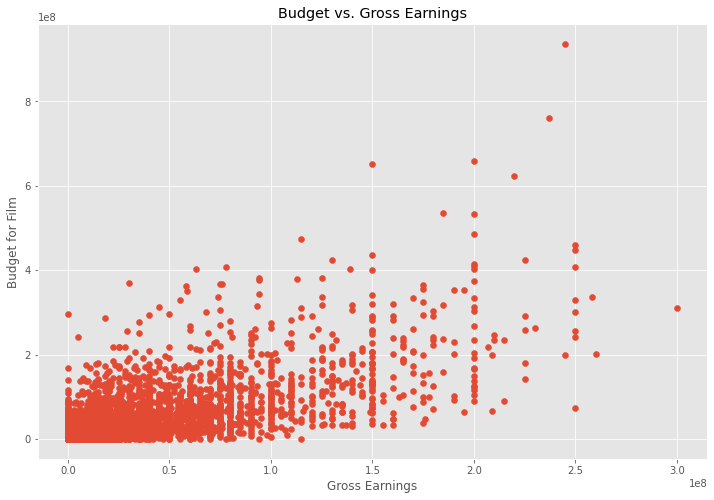

In [36]:
# Scatter plot with budget vs. gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs. Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')

plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

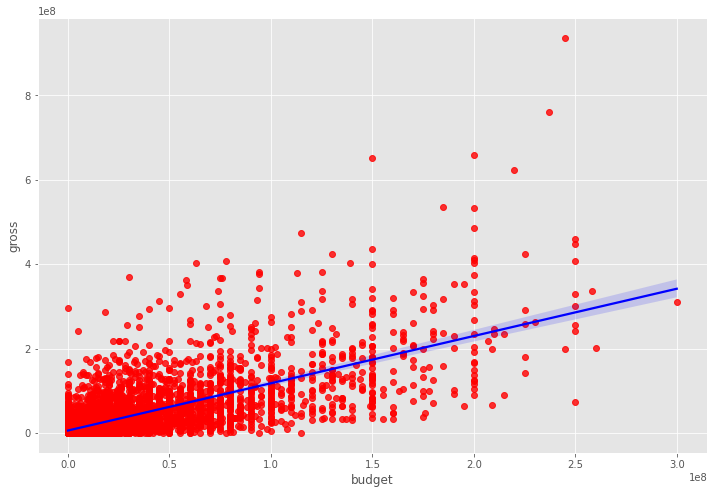

In [38]:
# Plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})

In [43]:
# Looking at coorelation bufget vs gross

df.corr(method='pearson') #method=pearson, kendall, spearman

,budget,gross,runtime,score,votes,year
budget,1.000000,0.712196,0.268226,0.042145,0.503924,0.291009
gross,0.712196,1.000000,0.224579,0.165693,0.662457,0.191548
runtime,0.268226,0.224579,1.000000,0.395343,0.317399,0.087639
score,0.042145,0.165693,0.395343,1.000000,0.393607,0.105276
votes,0.503924,0.662457,0.317399,0.393607,1.000000,0.229304
year,0.291009,0.191548,0.087639,0.105276,0.229304,1.000000


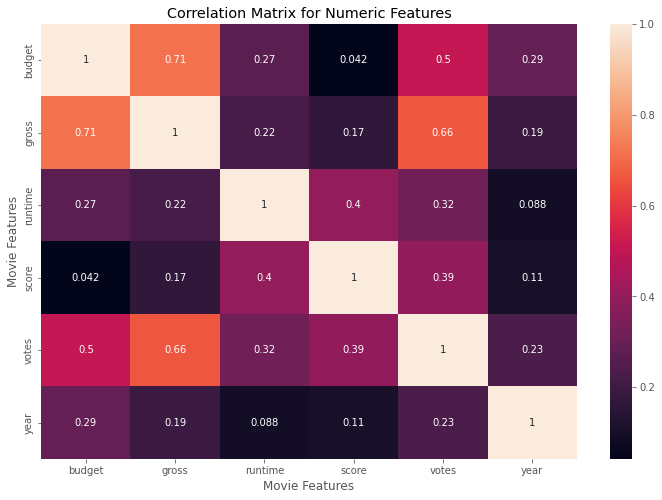

In [47]:
correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [48]:
# Look at company coorelation

df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,year_correct
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,1986


In [52]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,year_correct
0,8000000,665,54,2192,1,52287414,4661,8,39,89,8.1,2454,299174,3716,1986,0
1,6000000,1680,54,1296,4,70136369,1821,7,27,103,7.8,1605,264740,1970,1986,0
2,15000000,1680,54,2645,0,179800601,6203,6,23,110,6.9,2345,236909,1852,1986,0
3,18500000,2062,54,1066,0,85160248,295,8,33,137,8.4,2192,540152,1629,1986,0
4,9000000,2122,54,2123,1,18564613,1872,6,36,90,6.9,1139,36636,2549,1986,0


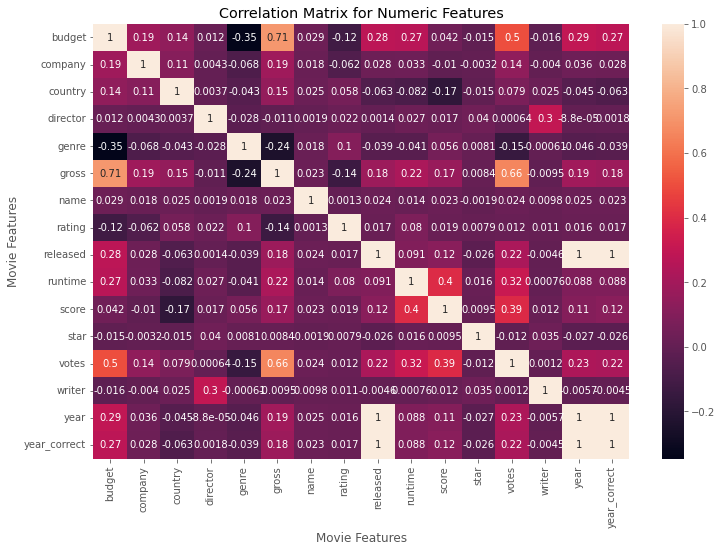

In [53]:
correlation_matrix = df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [55]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

budget        budget          1.000000
              company         0.187205
              country         0.137635
              director        0.011602
              genre          -0.346794
                                ...   
year_correct  star           -0.026050
              votes           0.220797
              writer         -0.004546
              year            0.996229
              year_correct    1.000000
Length: 256, dtype: float64

In [58]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre         budget         -0.346794
budget        genre          -0.346794
gross         genre          -0.242676
genre         gross          -0.242676
score         country        -0.174414
                                ...   
director      director        1.000000
country       country         1.000000
company       company         1.000000
year          year            1.000000
year_correct  year_correct    1.000000
Length: 256, dtype: float64

In [60]:
high_corr = sorted_pairs[(sorted_pairs)> 0.5]
high_corr

votes         budget          0.503924
budget        votes           0.503924
votes         gross           0.662457
gross         votes           0.662457
              budget          0.712196
budget        gross           0.712196
released      year            0.996187
year          released        0.996187
year_correct  year            0.996229
year          year_correct    0.996229
year_correct  released        0.999389
released      year_correct    0.999389
budget        budget          1.000000
writer        writer          1.000000
votes         votes           1.000000
star          star            1.000000
score         score           1.000000
runtime       runtime         1.000000
released      released        1.000000
rating        rating          1.000000
name          name            1.000000
gross         gross           1.000000
genre         genre           1.000000
director      director        1.000000
country       country         1.000000
company       company    

# Results

Votes and budget have the highest coorelation tp gross earnings \
Company has a low correlation